In [48]:
#Run this block to install the necessary packages
!python3 -m spacy download en_core_web_sm
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install spacy
%pip install nltk
%pip install wordcloud
%pip install textblob


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 7.5 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.3/626.3 kB 5.3 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [49]:
import pandas as pd
import numpy as np
import spacy
import nltk
from nltk.probability import FreqDist
from spacy.lang.en.stop_words import STOP_WORDS
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob

In [3]:
PSS = pd.DataFrame(pd.read_csv('LolDataNoSensitiveInfo.csv'))
PSS.head()


,StartDate,EndDate,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,DistributionChannel,UserLanguage,Rank,...,Q8_11,OpenChanges,BalancePriority _1,BalancePriority _2,BalancePriority _3,BalancePriority _4,BalancePriority _5,BalancePriority _6,BalancePriority _7,Q11
0,Start Date,End Date,Progress,Duration (in seconds),Finished,RecordedDate,ResponseID,DistributionChannel,User Language,Rank,...,Please Evaluate the Following Statements: - Th...,If you could make any direct change to the gam...,Please Rank The Following Options Based On Wha...,Please Rank The Following Options Based On Wha...,Please Rank The Following Options Based On Wha...,Please Rank The Following Options Based On Wha...,Please Rank The Following Options Based On Wha...,Please Rank The Following Options Based On Wha...,Please Rank The Following Options Based On Wha...,"If you had a different change in mind, please ..."
1,"{""ImportId"":""startDate"",""timeZone"":""America/De...","{""ImportId"":""endDate"",""timeZone"":""America/Denv...","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""America...","{""ImportId"":""_recordId""}","{""ImportId"":""distributionChannel""}","{""ImportId"":""userLanguage""}","{""ImportId"":""QID1""}",...,"{""ImportId"":""QID8_11""}","{""ImportId"":""QID9_TEXT""}","{""ImportId"":""QID10_1""}","{""ImportId"":""QID10_2""}","{""ImportId"":""QID10_3""}","{""ImportId"":""QID10_4""}","{""ImportId"":""QID10_5""}","{""ImportId"":""QID10_6""}","{""ImportId"":""QID10_7""}","{""ImportId"":""QID11_TEXT""}"
2,2023-12-07 13:48:20,2023-12-07 13:50:45,100,144,TRUE,2023-12-07 13:50:45,R_3subBtC5g7c4Wxd,anonymous,EN,Platinum - Diamond,...,Somewhat agree,I would force every player to uninstall the ga...,2,1,4,3,5,6,7,NaN
3,2023-12-07 13:47:48,2023-12-07 13:51:22,100,213,TRUE,2023-12-07 13:51:23,R_1q51xpgFhkylz0o,anonymous,EN,Platinum - Diamond,...,Neither agree nor disagree,"Nerf tank shredding tools, armor pen and %hp d...",1,2,4,6,7,5,3,Nerf/Fix bounties to be more consistent and in...
4,2023-12-07 13:48:32,2023-12-07 13:51:53,100,201,TRUE,2023-12-07 13:51:54,R_3kokwpJdjKzn4FZ,anonymous,EN,Platinum - Diamond,...,Somewhat agree,"Reduce the amount of dashes, cc and overall ov...",3,2,1,7,4,5,6,Increasing healing reduction just like it was ...


In [4]:
PSS.shape

(194, 35)

In [5]:
PSS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   StartDate              194 non-null    object
 1   EndDate                194 non-null    object
 2   Progress               194 non-null    object
 3   Duration (in seconds)  194 non-null    object
 4   Finished               194 non-null    object
 5   RecordedDate           194 non-null    object
 6   ResponseId             194 non-null    object
 7   DistributionChannel    194 non-null    object
 8   UserLanguage           194 non-null    object
 9   Rank                   192 non-null    object
 10  Gender                 191 non-null    object
 11  Q3                     193 non-null    object
 12  Q4                     185 non-null    object
 13  Veterancy              179 non-null    object
 14  PlayerStats            94 non-null     object
 15  Q8_1                   

Looking at the results of self.head() we can see that the first two rows dont have relevant data for us to use. This is because when qualtrics exported the data I had it include the qestions that I created as a row in the data sheet. I want to print these rows for later reference then discard them as they do not contain any relevant data. 

In [6]:
#Store and Print the row that contains the questions
Questions = PSS.iloc[0].values
print(Questions)

['Start Date' 'End Date' 'Progress' 'Duration (in seconds)' 'Finished'
 'RecordedDate' 'ResponseID' 'DistributionChannel' 'User Language' 'Rank'
 'Gender' 'Main Role' 'MainChamps'
 '(Optional) How Long Have You Been Playing The Game?' 'Player Stats'
 'Please Evaluate the Following Statements: - I Have fun when I play this game'
 'Please Evaluate the Following Statements: - I feel that my actions as a player directly impact the outcome of the game'
 'Please Evaluate the Following Statements: - I pick the Champions I play because they are strong'
 'Please Evaluate the Following Statements: - I pick the champions I play based on their strength'
 'Please Evaluate the Following Statements: - I am satisfied with the decisions made by the Riot Balance Team'
 'Please Evaluate the Following Statements: - I think the balance team does a good job communicating the reasons behind their decisions'
 'Please Evaluate the Following Statements: - I get frustrated when I play the game in its current sta

In [7]:
#Drop the first and second row.
PSS.drop(axis = 0, index = 1, inplace = True)
PSS.drop(axis = 0, index = 0, inplace= True)
PSS.head()

,StartDate,EndDate,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,DistributionChannel,UserLanguage,Rank,...,Q8_11,OpenChanges,BalancePriority _1,BalancePriority _2,BalancePriority _3,BalancePriority _4,BalancePriority _5,BalancePriority _6,BalancePriority _7,Q11
2,2023-12-07 13:48:20,2023-12-07 13:50:45,100,144,TRUE,2023-12-07 13:50:45,R_3subBtC5g7c4Wxd,anonymous,EN,Platinum - Diamond,...,Somewhat agree,I would force every player to uninstall the ga...,2,1,4,3,5,6,7,NaN
3,2023-12-07 13:47:48,2023-12-07 13:51:22,100,213,TRUE,2023-12-07 13:51:23,R_1q51xpgFhkylz0o,anonymous,EN,Platinum - Diamond,...,Neither agree nor disagree,"Nerf tank shredding tools, armor pen and %hp d...",1,2,4,6,7,5,3,Nerf/Fix bounties to be more consistent and in...
4,2023-12-07 13:48:32,2023-12-07 13:51:53,100,201,TRUE,2023-12-07 13:51:54,R_3kokwpJdjKzn4FZ,anonymous,EN,Platinum - Diamond,...,Somewhat agree,"Reduce the amount of dashes, cc and overall ov...",3,2,1,7,4,5,6,Increasing healing reduction just like it was ...
5,2023-12-07 13:47:19,2023-12-07 13:51:56,100,276,TRUE,2023-12-07 13:51:57,R_2DN9Qkb3Wn7LuiC,anonymous,EN,Platinum - Diamond,...,Somewhat agree,NaN,2,4,1,5,3,6,7,Nerf riven and hwei and not make new champs br...
6,2023-12-07 13:46:53,2023-12-07 13:52:05,100,312,TRUE,2023-12-07 13:52:05,R_RJfCcty4hT40eI1,anonymous,EN,Platinum - Diamond,...,Somewhat agree,I would like fights and lane phases to last lo...,2,6,5,3,1,7,4,NaN


In [8]:
#Missing and Null Value Cleaning
PSS.isnull().sum()


StartDate                  0
EndDate                    0
Progress                   0
Duration (in seconds)      0
Finished                   0
RecordedDate               0
ResponseId                 0
DistributionChannel        0
UserLanguage               0
Rank                       2
Gender                     3
Q3                         1
Q4                         9
Veterancy                 15
PlayerStats              100
Q8_1                      20
Q8_2                      19
Q8_3                      19
Q8_4                      20
Q8_5                      20
Q8_6                      19
Q8_7                      19
Q8_8                      21
Q8_9                      19
Q8_10                     19
Q8_11                     20
OpenChanges               50
BalancePriority _1        41
BalancePriority _2        41
BalancePriority _3        41
BalancePriority _4        41
BalancePriority _5        41
BalancePriority _6        41
BalancePriority _7        41
Q11           

From the function, we can see that there are quite a few null values in our data set. Using visual inspection in excel/numbers we can decide what to do with null values in each column.

In [9]:
#Ranked Column
PSS.Rank = PSS.Rank.fillna(value = 'Not Provided') #Fill the missing values with 'Not Provided'
#Gender Column
PSS.Gender = PSS.Gender.fillna(value = 'Prefer not to say') #Fill missing with prefer not to say
#Q3 Column
PSS.Q3 = PSS.Q3.fillna(value = 'No Preference / Fill') #Fill missing with No Preference / Fill
#Q4 Column
PSS.Q4 = PSS.Q4.fillna(value = 'No Main Champ') #Fill missing with No Main Champ
#Veterancy
PSS.Veterancy = PSS.Veterancy.fillna(value = 'Not Provided') #Fill missing with Empty
#Player Stats
PSS.PlayerStats = PSS.PlayerStats.fillna(value = 'Not Provided') #Fill missing with Empty


I'll explain the reasoning behind the columns so far.
For the ranked column I wanted to mark that the participant did not want to share their rank which is fine because the question is optional.
For the Gender Column there was a prefer not to say option listed in the drop down so I'll just safely assume that by leaving the question blank the participant wanted to not share their gender but didn't see that option.
For the Question 3 Column, this regarded the player listing their main or preferred role, if it was left blank Ill just assume they have no preference/fill, if they listed their OP.GG i could use a script to identify their most played champ and fill it in but for now we'll just keep it simple.
For the Question 4 Column, the participant was asked what their main champ was, once again I'm keeping it simple and filling it to mark they don't have a main champion.
For the veterancy Column, participants were supposed to mark or write how long they have played the game, I decided to just fill missing values with not provided in order to mark that they chose not to share this info
Finally, for the player stats column, this is where they were supposed to share their username or op.gg link, I decided to mark when they chose not to share that information.

Next columns deal with responses, with these I would like to drop rows that have more than 2 missing values in the columns because they are ranked choice questions and not having a ranking for a certain category is not a valid response.

In [10]:
#drop rows with too many missing values
threshold = 1 #1 or more missing values -> drop the row
PSS = PSS.dropna(thresh = PSS.shape[1] - threshold)

In [11]:
#Recount Null Values
PSS.isna().sum()

StartDate                 0
EndDate                   0
Progress                  0
Duration (in seconds)     0
Finished                  0
RecordedDate              0
ResponseId                0
DistributionChannel       0
UserLanguage              0
Rank                      0
Gender                    0
Q3                        0
Q4                        0
Veterancy                 0
PlayerStats               0
Q8_1                      0
Q8_2                      0
Q8_3                      0
Q8_4                      0
Q8_5                      0
Q8_6                      0
Q8_7                      0
Q8_8                      0
Q8_9                      0
Q8_10                     0
Q8_11                     0
OpenChanges               4
BalancePriority _1        0
BalancePriority _2        0
BalancePriority _3        0
BalancePriority _4        0
BalancePriority _5        0
BalancePriority _6        0
BalancePriority _7        0
Q11                      99
dtype: int64

In [16]:
#I also want to rename some of the columns because Q3 and Q4 are not descriptive enough
PSS.rename(columns = {'Q3':'MainRole'}, inplace = True) #This column holds which role the participant listed as their main role
PSS.rename(columns = {'Q4':'MainedChamp'}, inplace = True) #This column asked players to list which champ(s) they mained, this could hold multiple values that we need to parse later
PSS.rename(columns = {'Q11':'OtherChanges'}, inplace = True) #Finally this was the response to the open question of what other changes they might want to see in the game
PSS.rename(columns = {'OpenChanges ':'OpenChanges'}, inplace = True)
print(PSS.columns) #show the column names

Index(['StartDate', 'EndDate', 'Progress', 'Duration (in seconds)', 'Finished',
       'RecordedDate', 'ResponseId', 'DistributionChannel', 'UserLanguage',
       'Rank', 'Gender', 'MainRole', 'MainedChamp', 'Veterancy', 'PlayerStats',
       'Q8_1', 'Q8_2', 'Q8_3', 'Q8_4', 'Q8_5', 'Q8_6', 'Q8_7', 'Q8_8', 'Q8_9',
       'Q8_10', 'Q8_11', 'OpenChanges', 'BalancePriority _1',
       'BalancePriority _2', 'BalancePriority _3', 'BalancePriority _4',
       'BalancePriority _5', 'BalancePriority _6', 'BalancePriority _7',
       'OtherChanges'],
      dtype='object')


Next, we have some open ended questions and responses in the survey, These responses need to be cleaned, tokenized, parsed, and fed into an algorithm to code and extract their meaning.

In [17]:
#load the English Tokenizer, Tagger, Parser, NER and Word Vectors.
nlp = spacy.load('en_core_web_sm')
#Print our column names again for later reference.
print(PSS.columns)

Index(['StartDate', 'EndDate', 'Progress', 'Duration (in seconds)', 'Finished',
       'RecordedDate', 'ResponseId', 'DistributionChannel', 'UserLanguage',
       'Rank', 'Gender', 'MainRole', 'MainedChamp', 'Veterancy', 'PlayerStats',
       'Q8_1', 'Q8_2', 'Q8_3', 'Q8_4', 'Q8_5', 'Q8_6', 'Q8_7', 'Q8_8', 'Q8_9',
       'Q8_10', 'Q8_11', 'OpenChanges', 'BalancePriority _1',
       'BalancePriority _2', 'BalancePriority _3', 'BalancePriority _4',
       'BalancePriority _5', 'BalancePriority _6', 'BalancePriority _7',
       'OtherChanges'],
      dtype='object')


The Columns which contain the response text we want to have our algorithm is OpenChanges and Other Changes, the MainRole and MainedChamp also contain open responses that it might be useful to have our algorithm examine as well.

In [62]:
tokens = [] #holds tokens
for response in PSS['OpenChanges']:
    if isinstance(response, str):
        doc = nlp(response)
        tokens.extend([token.lemma_ for token in doc if not token.is_stop and not token.is_punct and not token.is_space])

freq_dist = FreqDist(tokens)
common_words = freq_dist.most_common(100)

print(common_words)


[('game', 38), ('remove', 21), ('champion', 19), ('like', 15), ('change', 14), ('lane', 13), ('item', 12), ('play', 12), ('nerf', 11), ('reduce', 11), ('new', 11), ('role', 10), ('jungle', 10), ('damage', 9), ('ability', 9), ('champ', 9), ('bring', 8), ('support', 8), ('player', 7), ('time', 7), ('ban', 7), ('well', 7), ('map', 7), ('ad', 7), ('rework', 7), ('bot', 7), ('laner', 6), ('adc', 6), ('delete', 6), ('revert', 6), ('rank', 6), ('not', 6), ('season', 6), ('fight', 5), ('balance', 5), ('way', 5), ('high', 5), ('AP', 5), ('ADC', 5), ('impact', 5), ('improve', 5), ('dash', 4), ('certain', 4), ('2', 4), ('year', 4), ('fix', 4), ('hard', 4), ('make', 4), ('take', 4), ('old', 4), ('buff', 4), ('able', 4), ('gold', 4), ('add', 4), ('think', 4), ('mode', 4), ('try', 4), ('feel', 4), ('1', 4), ('assassin', 4), ('5', 4), ('get', 4), ('e', 4), ('increase', 4), ('cooldown', 4), ('rune', 4), ('bit', 4), ('mid', 4), ('tank', 3), ('overall', 3), ('kit', 3), ('release', 3), ('long', 3), ('mea

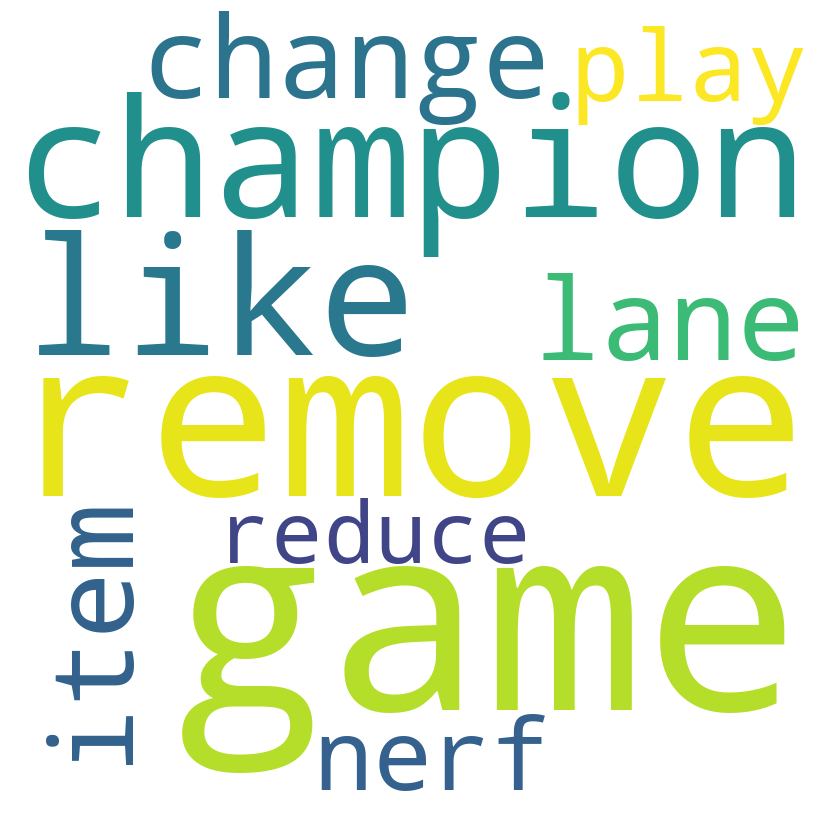

In [61]:
#Word Cloud
wordcloud_string = ' '.join([word for word, _ in common_words])

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = STOP_WORDS, 
                min_font_size = 10).generate(wordcloud_string)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

In [63]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('brown')

responses = PSS['OpenChanges']

# Extract key phrases
key_phrases = []
for response in responses:
    if isinstance(response, str):
        blob = TextBlob(response)
        key_phrases.extend(blob.noun_phrases)

print(key_phrases)
freq_dist2 = FreqDist(key_phrases)
common_phrases = freq_dist2.most_common(100)
print(common_phrases)

PSS["OpenChangesSummary"] = key_phrases

['nerf', 'armor pen', '% hp damage', 'reduce', 'new champion', 'lane phases', 'neutral objectives', 'hots', 'champion rotation', 'mtgarena', 'certain set', 'bullshit champions', 'recent years', 'bring', 'fixing the client', 'game designer', 'zilean', 'fix client', 'propper custom', 'adcs', 'literally everyone', 'bring', 'bounty system', 'old shaco', 'stop', 'braindead shitskins', "n't bug", 'new patches', 'intermediate players', "'d buff", "vel'koz", 'custom', 'custom', 'toxic people', 'view character abilities', 'training options', 'specific items', 'comprehensive stat', 'item breakdowns', 'gold minions', 'champ kills', 'game client', 'game types', 'quicker game types', 'easy stress', 'free way', 'test champions', 'delete yone', 'co-op', 'odyssey', 'game modes', 'casual player base', 'new players', 'game mechanics', 'revert', 'item changes', 'bring', 'swain', 'bring', 'duo q', 'high elo', 'voice coms', 'new champions', 'remove', 'bard', 'dont need panth', 'tower dive', '% hp', 'nerf a

[nltk_data] Downloading package punkt to /Users/mainuser/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/mainuser/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package brown to /Users/mainuser/nltk_data...
[nltk_data]   Package brown is already up-to-date!


ValueError: Length of values (361) does not match length of index (135)

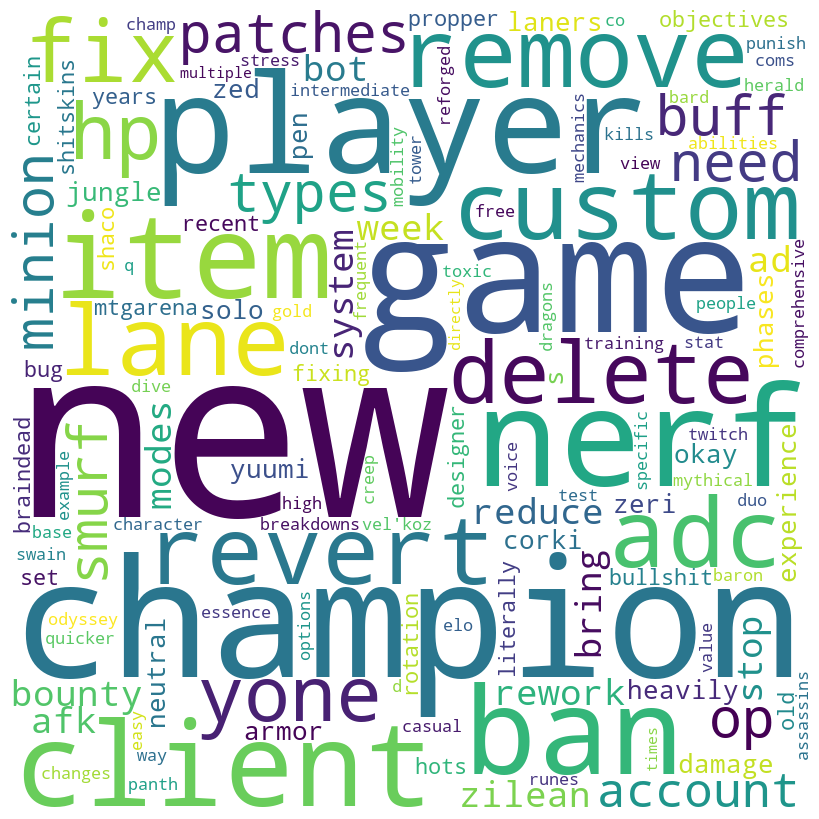

In [59]:

wordcloud_string2 = ' '.join([phrase for phrase, _ in common_phrases])

wordcloud2 = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = STOP_WORDS, 
                min_font_size = 10).generate(wordcloud_string2)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud2) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()